# Loading Trump's tariffs dataset 🚢📊

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/us-tariffs-2025/Tariff Calculations.csv', delimiter=';', encoding='ascii')

In [3]:
df.head()

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response
0,China,"-295,401.6","143,545.7","438,947.4",67%,34%
1,European Union,"-235,571.2","370,189.2","605,760.4",39%,19%
2,Mexico**,"-171,809.2","334,041.4","505,850.6",34%,17%
3,Vietnam,"-123,463.0","13,098.2","136,561.2",90%,45%
4,Taiwan,"-73,927.2","42,336.9","116,264.0",64%,32%


In [4]:
df.tail()

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response
199,Panama*,"10,146.3","10,702.1",555.8,10%,10%
200,United Kingdom,"11,856.9","79,941.3","68,084.5",10%,10%
201,Australia*,"17,907.8","34,593.3","16,685.5",10%,10%
202,United Arab Emirates,"19,494.9","26,969.3","7,474.4",10%,10%
203,Hong Kong,"21,913.5","27,886.4","5,972.9",10%,10%


# Fixing some columns and removing irrelevant characters 🛠️✂️

In [5]:
def clean_currency(val):
    return float(str(val).replace(',', '').replace('%', ''))


numeric_cols = ['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)',
                'Trump Tariffs Alleged', 'Trump Response']

for col in numeric_cols:
    df[col] = df[col].apply(clean_currency)

df['Country'] = df['Country'].str.replace(r'\*\*', '', regex=True)

# Feature engineering 🔧📈

In [6]:
df['Trade Volume'] = df['US 2024 Exports'] + df['US 2024 Imports (Customs Basis)']
df['Tariff Difference'] = df['Trump Tariffs Alleged'] - df['Trump Response']
df['Deficit Ratio'] = df['US 2024 Deficit'] / df['Trade Volume']
df['Export Share'] = df['US 2024 Exports'] / df['Trade Volume']
df['Import Share'] = df['US 2024 Imports (Customs Basis)'] / df['Trade Volume']
df['Tariff Burden Alleged ($B)'] = df['Trump Tariffs Alleged'] / 100 * df['US 2024 Imports (Customs Basis)']
df['Tariff Burden Response ($B)'] = df['Trump Response'] / 100 * df['US 2024 Imports (Customs Basis)']
df['Tariff Adjustment Ratio'] = df['Trump Response'] / df['Trump Tariffs Alleged']
df['Deficit per Import'] = df['US 2024 Deficit'] / df['US 2024 Imports (Customs Basis)']
df['Deficit per Export'] = df['US 2024 Deficit'] / df['US 2024 Exports']
df['Tariff Weighted Deficit (Alleged)'] = df['US 2024 Deficit'] * df['Trump Tariffs Alleged'] / 100
df['Tariff Weighted Deficit (Response)'] = df['US 2024 Deficit'] * df['Trump Response'] / 100
df['Symmetric Tariff Gap'] = (df['Trump Tariffs Alleged'] - df['Trump Response']) / \
                             ((df['Trump Tariffs Alleged'] + df['Trump Response']) / 2)
df['Trade Intensity Index'] = (df['US 2024 Exports'] - df['US 2024 Imports (Customs Basis)']) / df['Trade Volume']

# Basic data overview 👀📋

In [7]:
print("\n🧾 Dataset Shape:", df.shape)
print("\n🔍 Dtypes:")
print(df.dtypes)

print("\n🧼 Missing values:")
print(df.isnull().sum())

print("\n📊 Summary stats:")
print(df.describe().T)


🧾 Dataset Shape: (204, 20)

🔍 Dtypes:
Country                                object
US 2024 Deficit                       float64
US 2024 Exports                       float64
US 2024 Imports (Customs Basis)       float64
Trump Tariffs Alleged                 float64
Trump Response                        float64
Trade Volume                          float64
Tariff Difference                     float64
Deficit Ratio                         float64
Export Share                          float64
Import Share                          float64
Tariff Burden Alleged ($B)            float64
Tariff Burden Response ($B)           float64
Tariff Adjustment Ratio               float64
Deficit per Import                    float64
Deficit per Export                    float64
Tariff Weighted Deficit (Alleged)     float64
Tariff Weighted Deficit (Response)    float64
Symmetric Tariff Gap                  float64
Trade Intensity Index                 float64
dtype: object

🧼 Missing values:
Country 

# EDA (Exploratory Data Analysis) 🔍📊

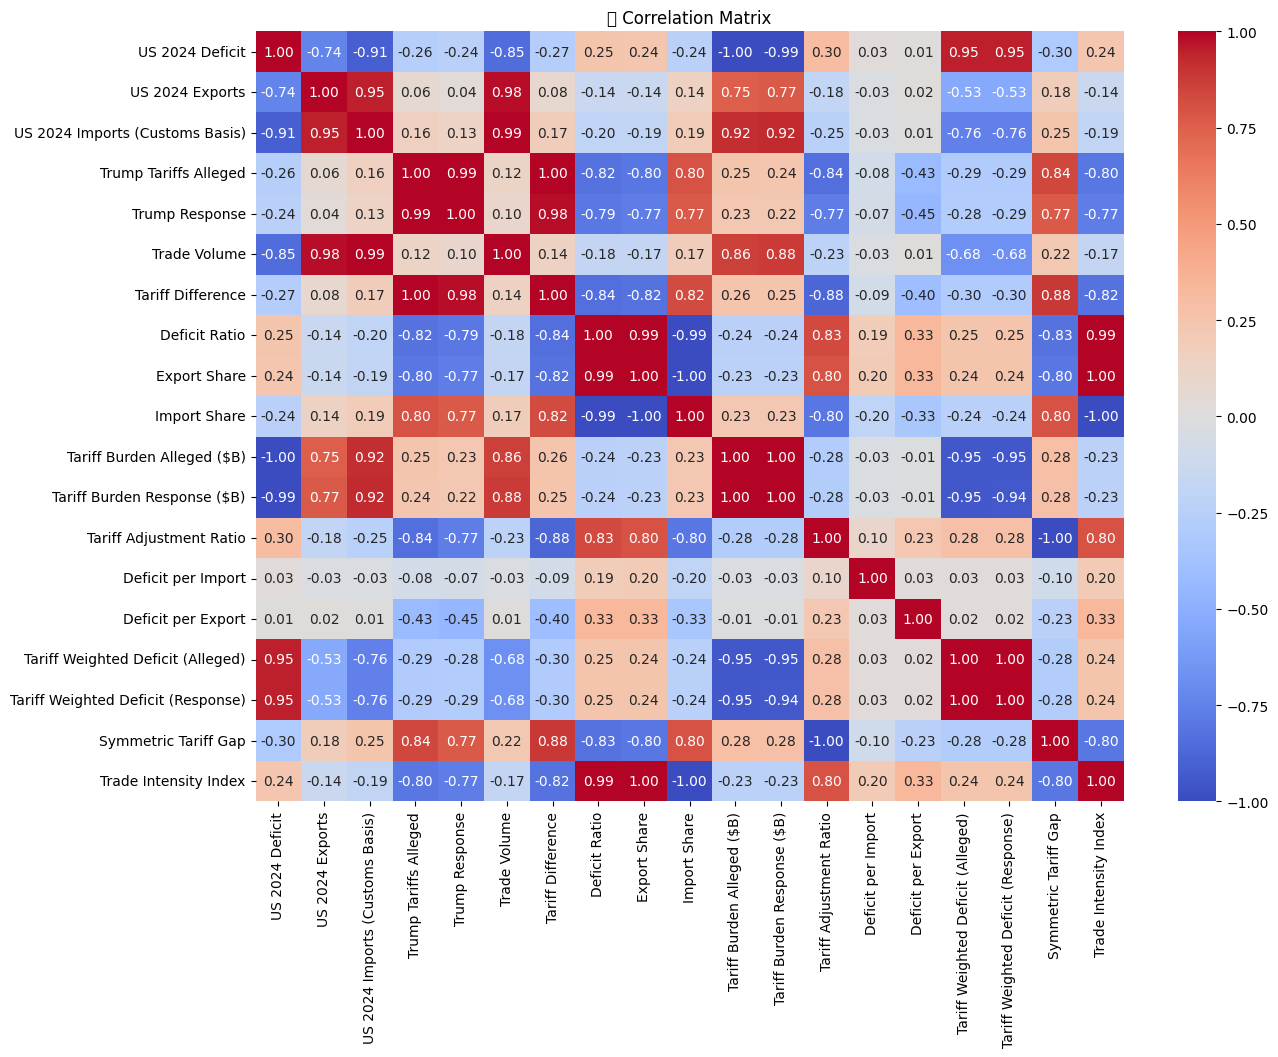

In [8]:
#--- CORRELATION MATRIX ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Matrix")
plt.show()

In [9]:
# VIF (multicollinearity check)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.select_dtypes(include='number').drop(columns=['Cluster'], errors='ignore')
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\n🧮 Variance Inflation Factors (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))


🧮 Variance Inflation Factors (VIF):
                               feature           VIF
9                         Import Share           inf
5                         Trade Volume           inf
1                      US 2024 Exports           inf
8                         Export Share           inf
6                    Tariff Difference           inf
18               Trade Intensity Index           inf
4                       Trump Response           inf
3                Trump Tariffs Alleged           inf
2      US 2024 Imports (Customs Basis)           inf
0                      US 2024 Deficit  4.686156e+08
16  Tariff Weighted Deficit (Response)  4.442159e+04
15   Tariff Weighted Deficit (Alleged)  4.060424e+04
7                        Deficit Ratio  2.399150e+04
10          Tariff Burden Alleged ($B)  1.779948e+04
11         Tariff Burden Response ($B)  1.337719e+04
17                Symmetric Tariff Gap  4.847338e+03
12             Tariff Adjustment Ratio  3.135163e+03
14       

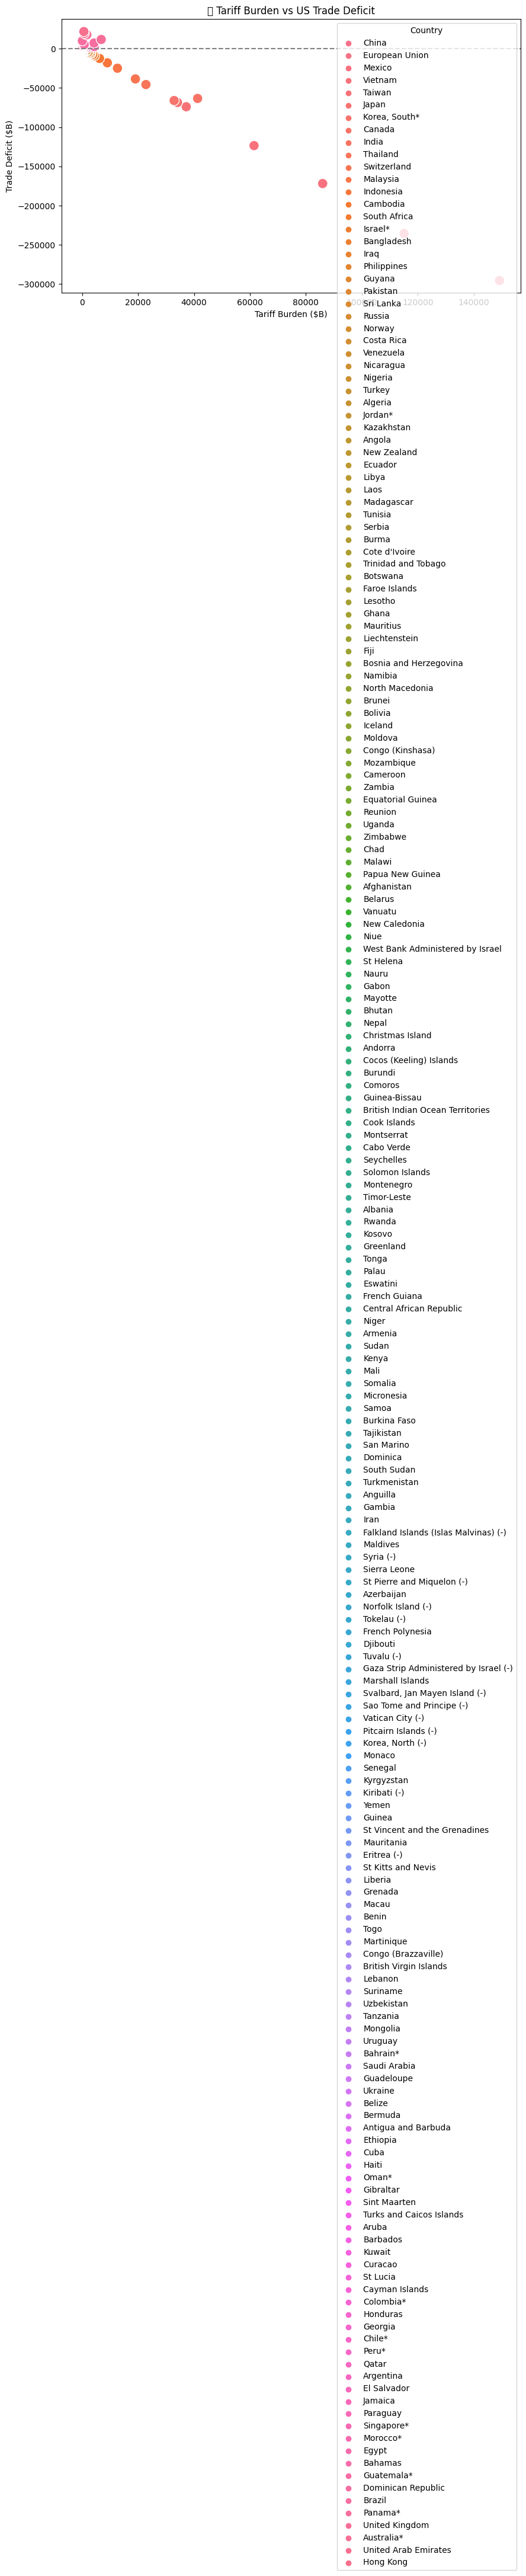

In [10]:
# Tariff Burden vs Deficit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tariff Burden Response ($B)', y='US 2024 Deficit', hue='Country', s=150)
plt.axhline(0, linestyle='--', color='gray')
plt.title("💰 Tariff Burden vs US Trade Deficit")
plt.xlabel("Tariff Burden ($B)")
plt.ylabel("Trade Deficit ($B)")
plt.show()

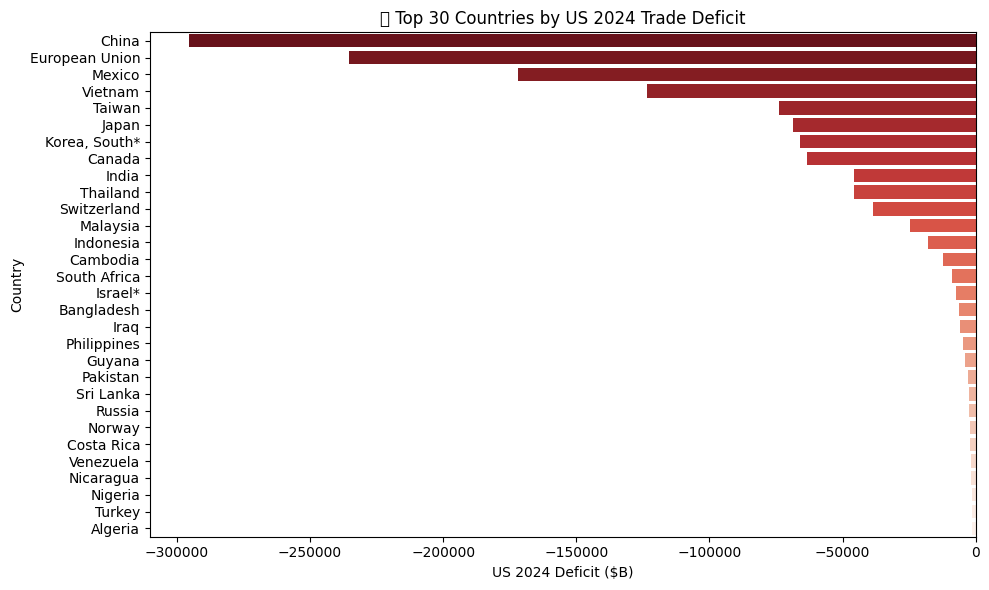

In [11]:
top10_deficit = df.sort_values(by='US 2024 Deficit', ascending=True).head(30)
#print(top10_deficit[['Country', 'US 2024 Deficit']])
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_deficit, x='US 2024 Deficit', y='Country', palette='Reds_r')
plt.title("🔟 Top 30 Countries by US 2024 Trade Deficit")
plt.xlabel("US 2024 Deficit ($B)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

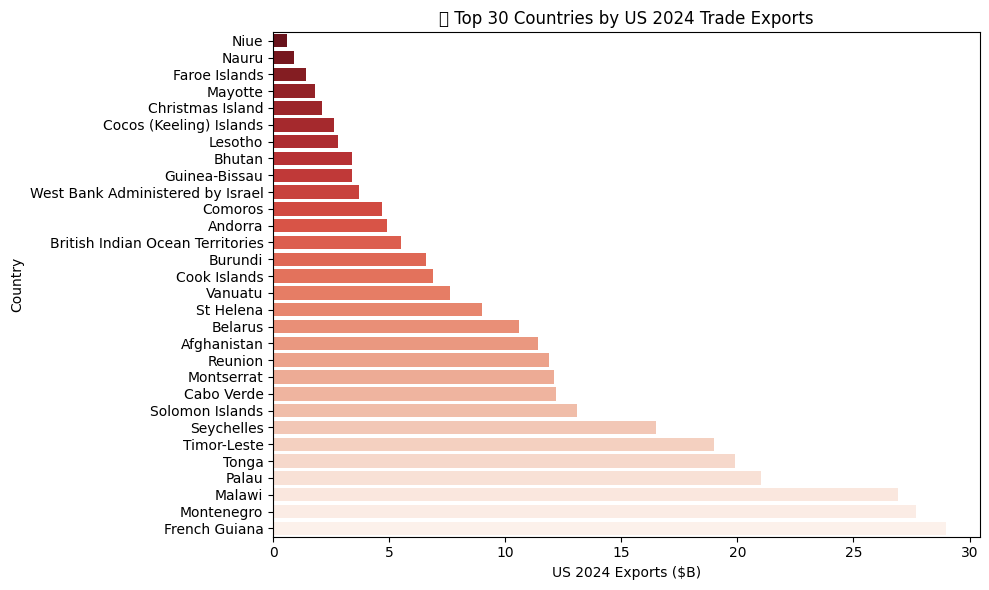

In [12]:
top10_deficit = df.sort_values(by='US 2024 Exports', ascending=True).head(30)
#print(top10_deficit[['Country', 'US 2024 Deficit']])
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_deficit, x='US 2024 Exports', y='Country', palette='Reds_r')
plt.title("🔟 Top 30 Countries by US 2024 Trade Exports")
plt.xlabel("US 2024 Exports ($B)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

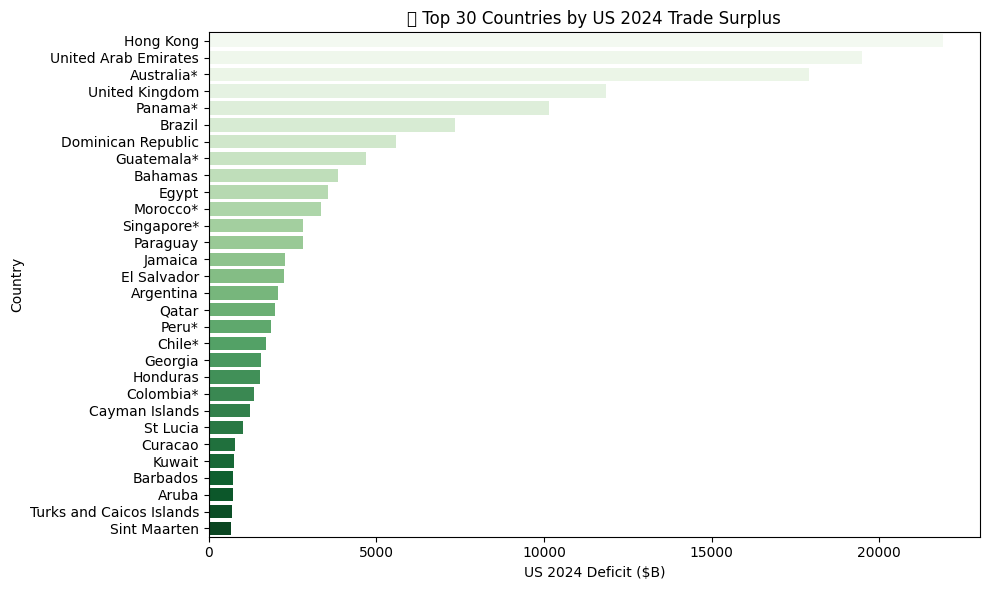

In [13]:
top10_deficit = df.sort_values(by='US 2024 Deficit', ascending=False).head(30)
#print(top10_deficit[['Country', 'US 2024 Deficit']])
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_deficit, x='US 2024 Deficit', y='Country', palette='Greens')
plt.title("🔟 Top 30 Countries by US 2024 Trade Surplus")
plt.xlabel("US 2024 Deficit ($B)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

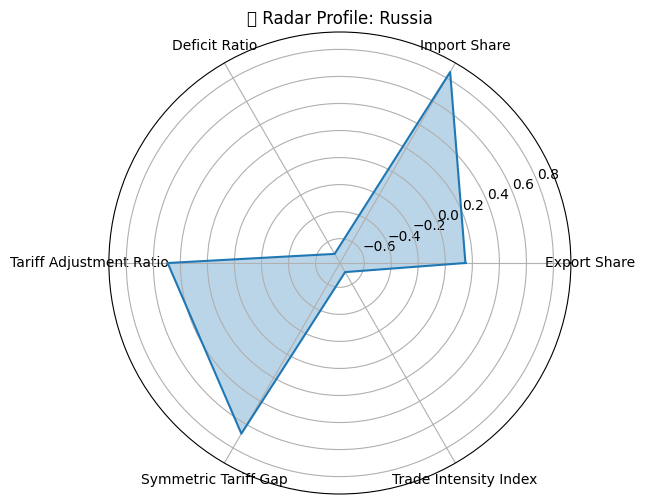

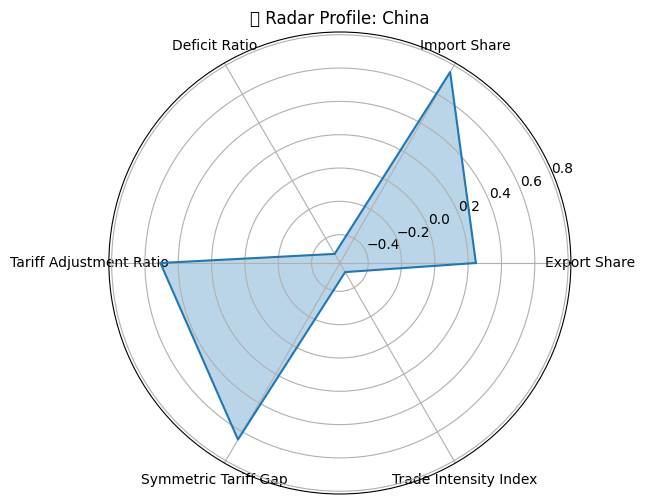

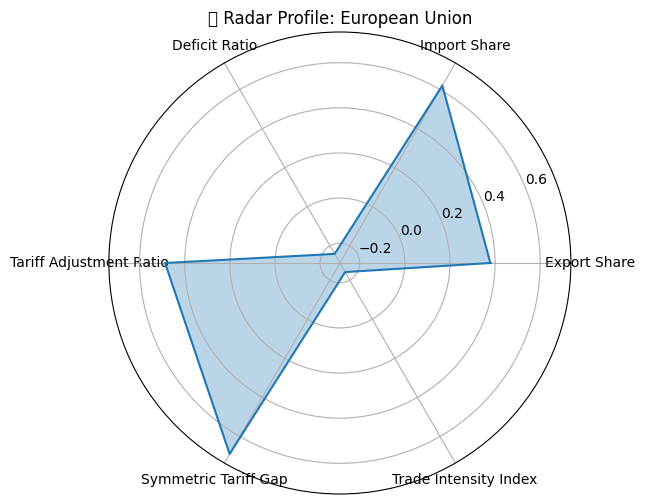

In [14]:
def radar_chart(country_name):
    from math import pi
    selected = df[df['Country'] == country_name]
    radar_cols = [
        'Export Share', 'Import Share', 'Deficit Ratio', 'Tariff Adjustment Ratio',
        'Symmetric Tariff Gap', 'Trade Intensity Index'
    ]
    values = selected[radar_cols].values.flatten().tolist()
    values += values[:1] 
    categories = radar_cols
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)

    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.3)
    plt.title(f"🌐 Radar Profile: {country_name}")
    plt.show()

radar_chart('Russia')
radar_chart('China')
radar_chart('European Union')

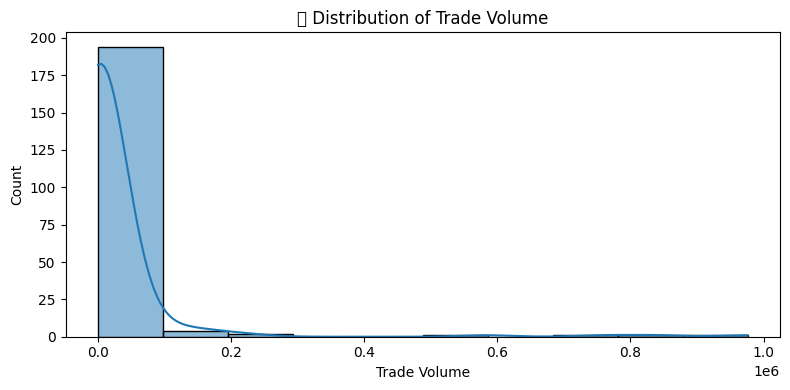

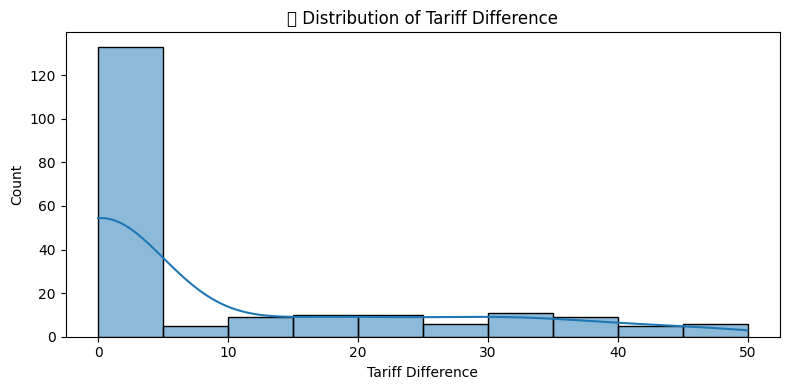

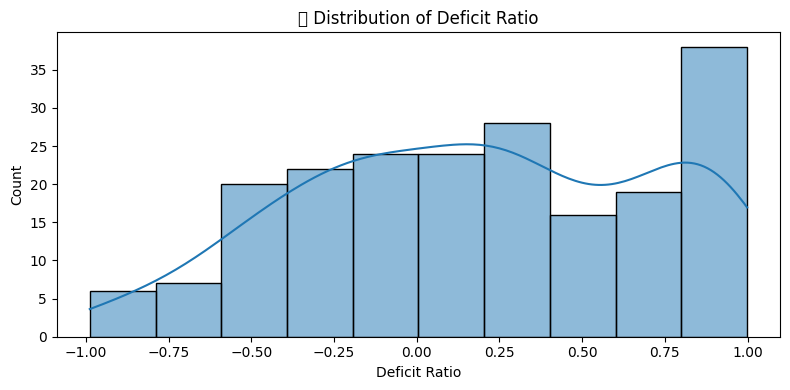

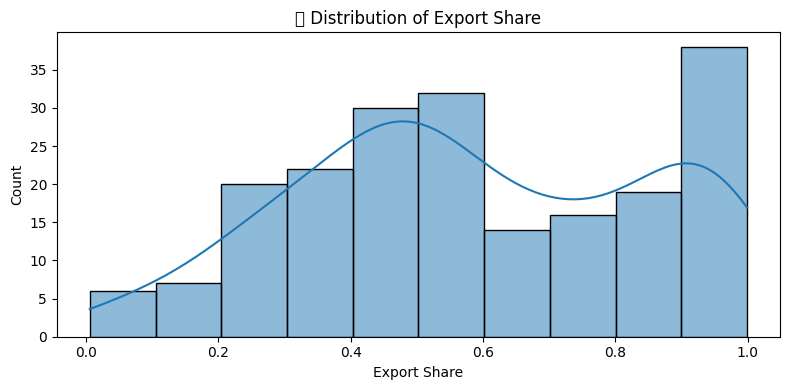

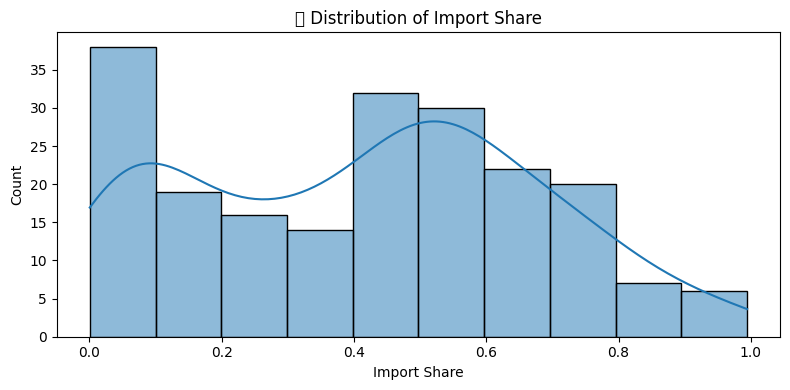

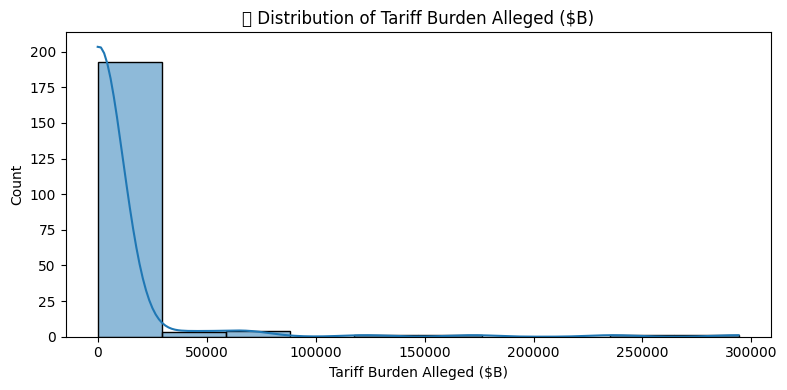

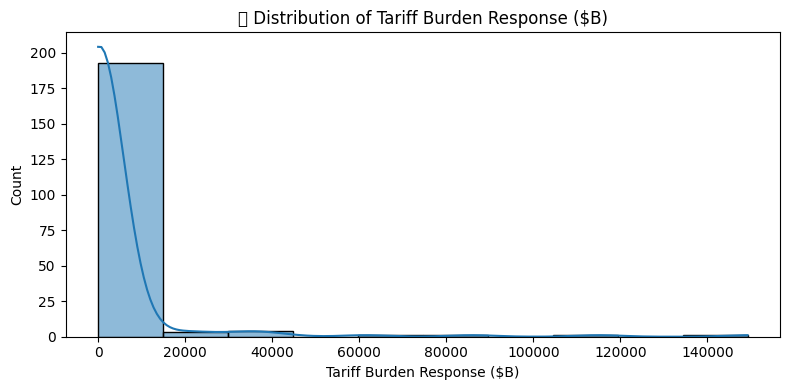

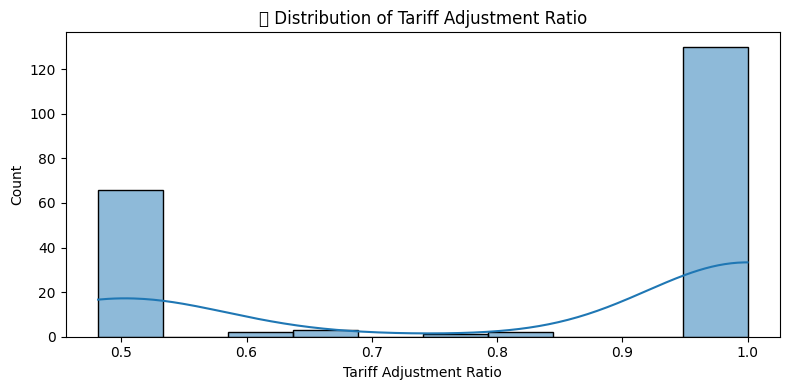

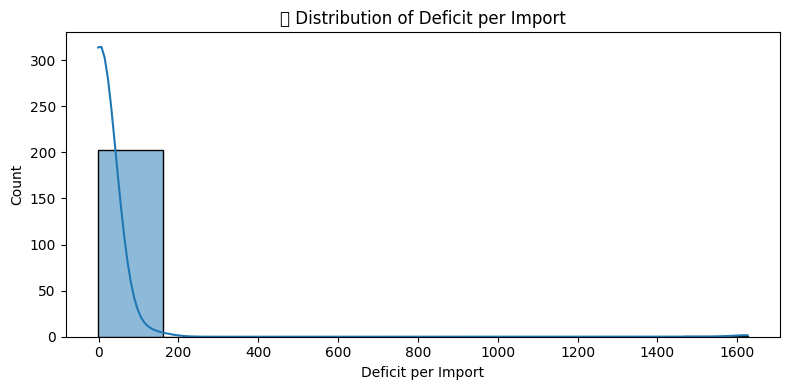

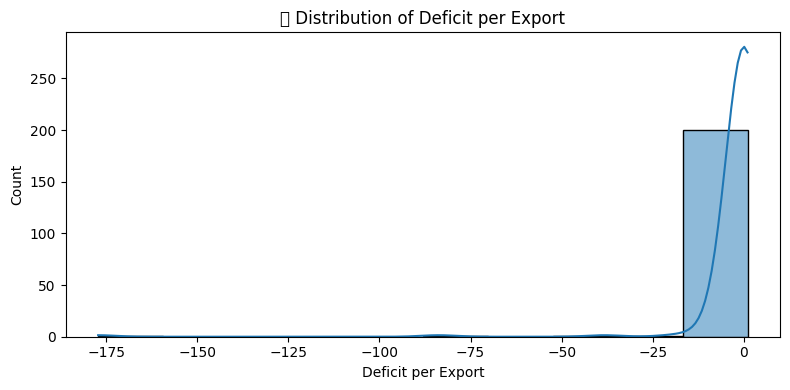

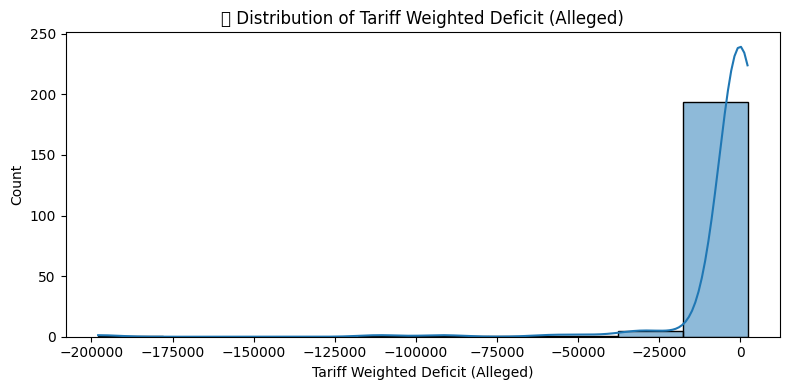

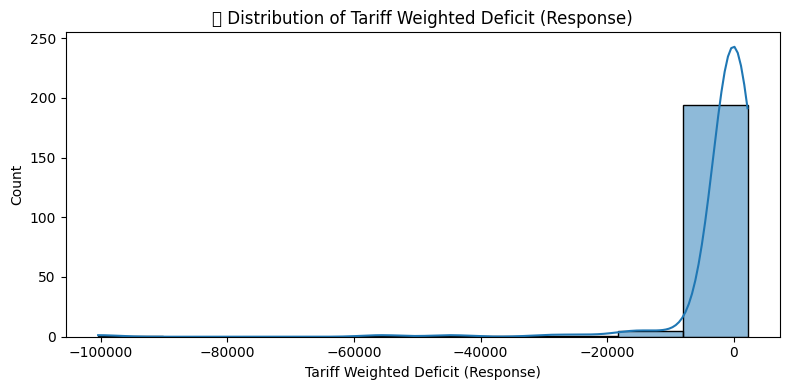

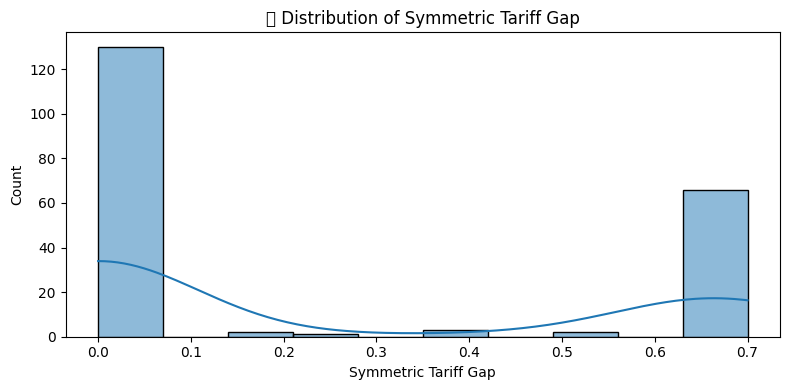

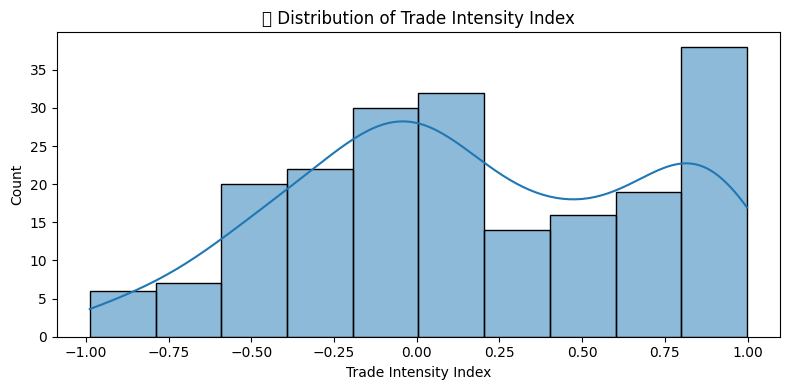

In [15]:
#--- DISTRIBUTIONS OF EACH COLUMN ---
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = [
    'Trade Volume', 'Tariff Difference', 'Deficit Ratio',
    'Export Share', 'Import Share', 'Tariff Burden Alleged ($B)',
    'Tariff Burden Response ($B)', 'Tariff Adjustment Ratio',
    'Deficit per Import', 'Deficit per Export',
    'Tariff Weighted Deficit (Alleged)', 'Tariff Weighted Deficit (Response)',
    'Symmetric Tariff Gap', 'Trade Intensity Index'
]

for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f"📈 Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


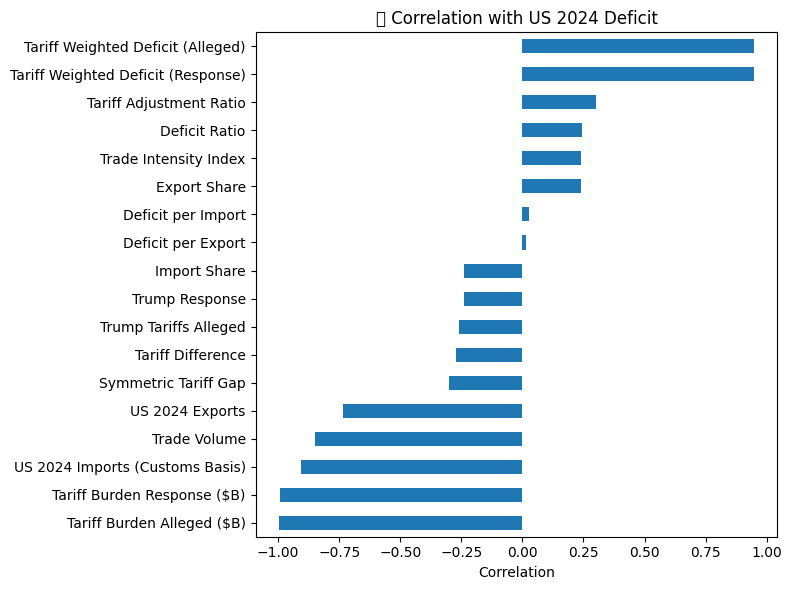

In [16]:
correlation_target = df.select_dtypes(include='number').corr()['US 2024 Deficit'].drop('US 2024 Deficit')
correlation_target.sort_values().plot(kind='barh', figsize=(8, 6), title='🔍 Correlation with US 2024 Deficit')
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

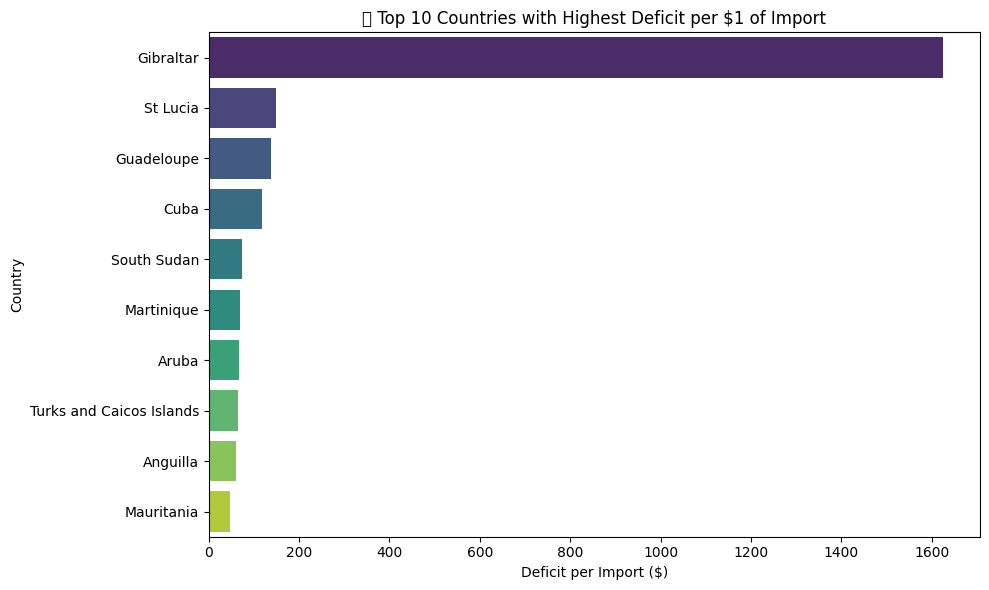

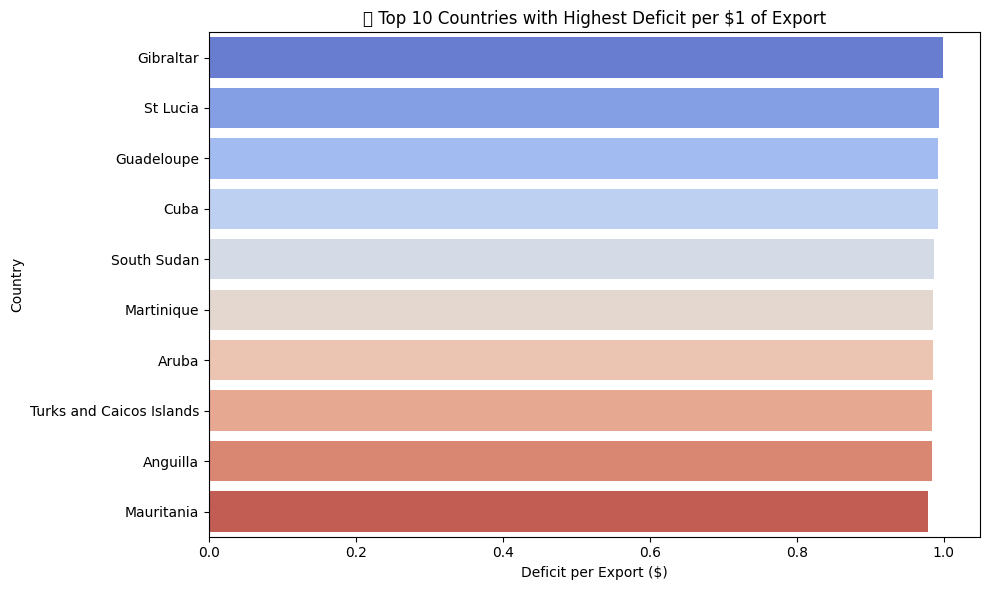

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df[['Country', 'Deficit per Import', 'Deficit per Export']].sort_values(
    'Deficit per Import', ascending=False
).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(data=outliers, 
            x='Deficit per Import', 
            y='Country', 
            palette='viridis')

plt.title("🚨 Top 10 Countries with Highest Deficit per $1 of Import")
plt.xlabel("Deficit per Import ($)")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=outliers, 
            x='Deficit per Export', 
            y='Country', 
            palette='coolwarm')

plt.title("🚨 Top 10 Countries with Highest Deficit per $1 of Export")
plt.xlabel("Deficit per Export ($)")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


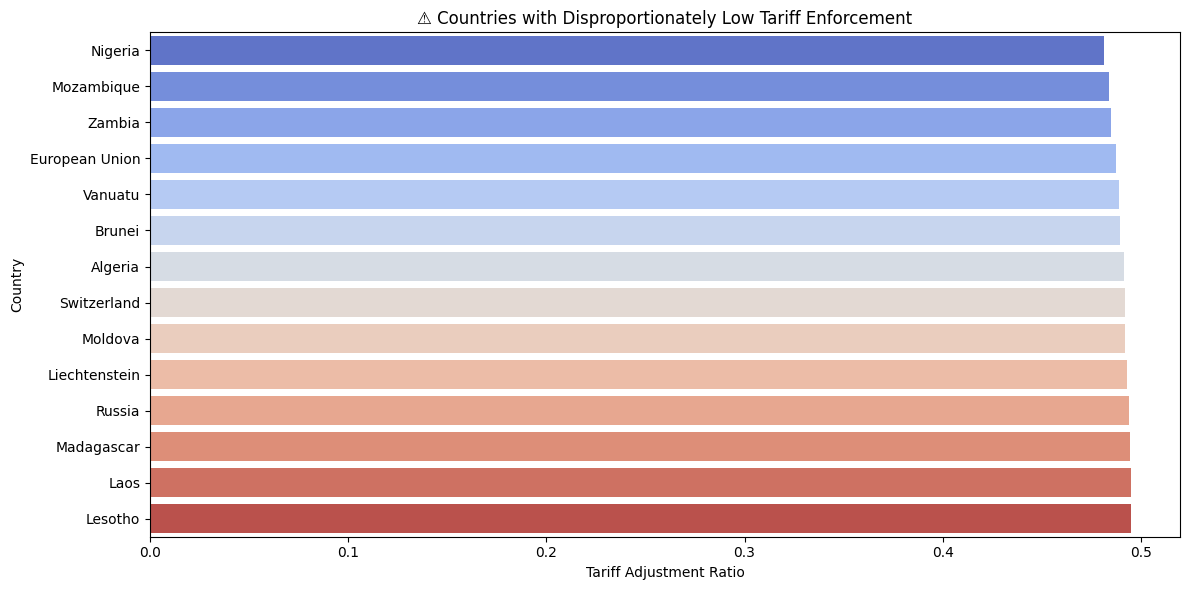

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.5
underadjusted = df[df['Tariff Adjustment Ratio'] < threshold][['Country', 'Trump Tariffs Alleged', 'Trump Response', 'Tariff Adjustment Ratio']]
underadjusted_sorted = underadjusted.sort_values('Tariff Adjustment Ratio')

plt.figure(figsize=(12, 6))
sns.barplot(data=underadjusted_sorted, x='Tariff Adjustment Ratio', y='Country', palette='coolwarm')

plt.title("⚠️ Countries with Disproportionately Low Tariff Enforcement")
plt.xlabel("Tariff Adjustment Ratio")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

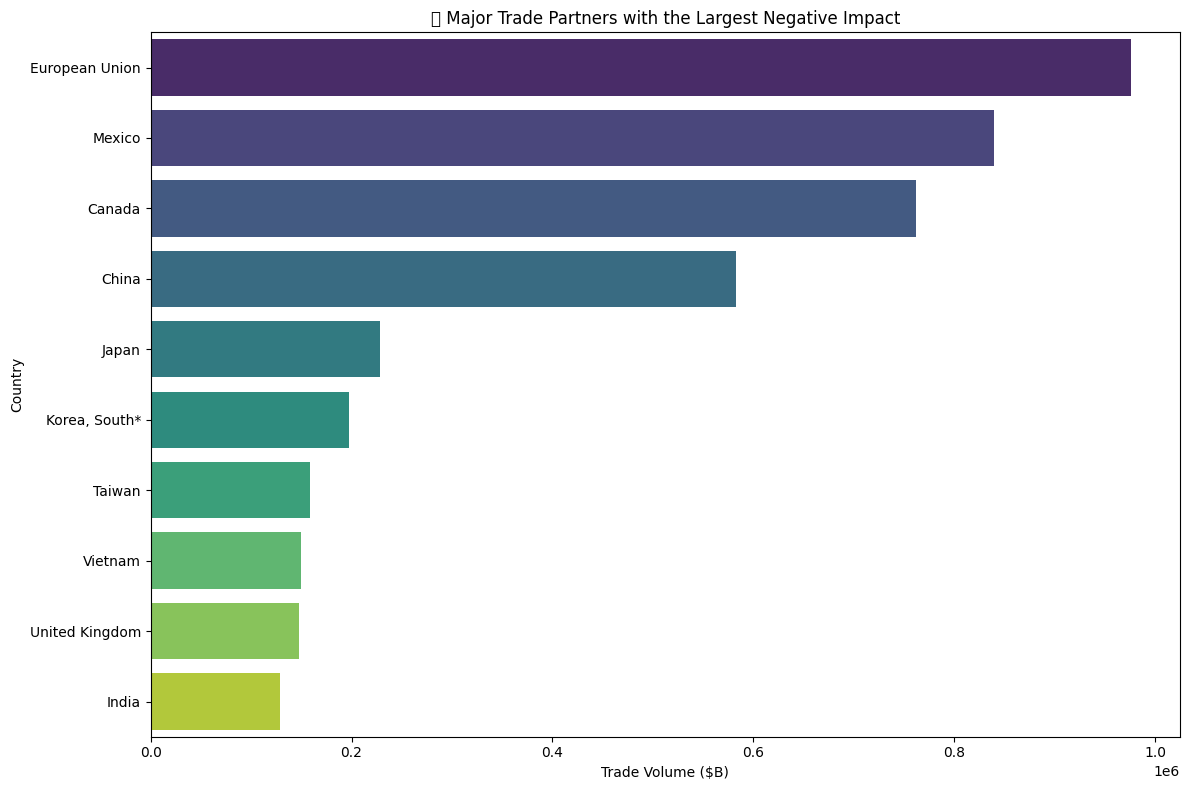

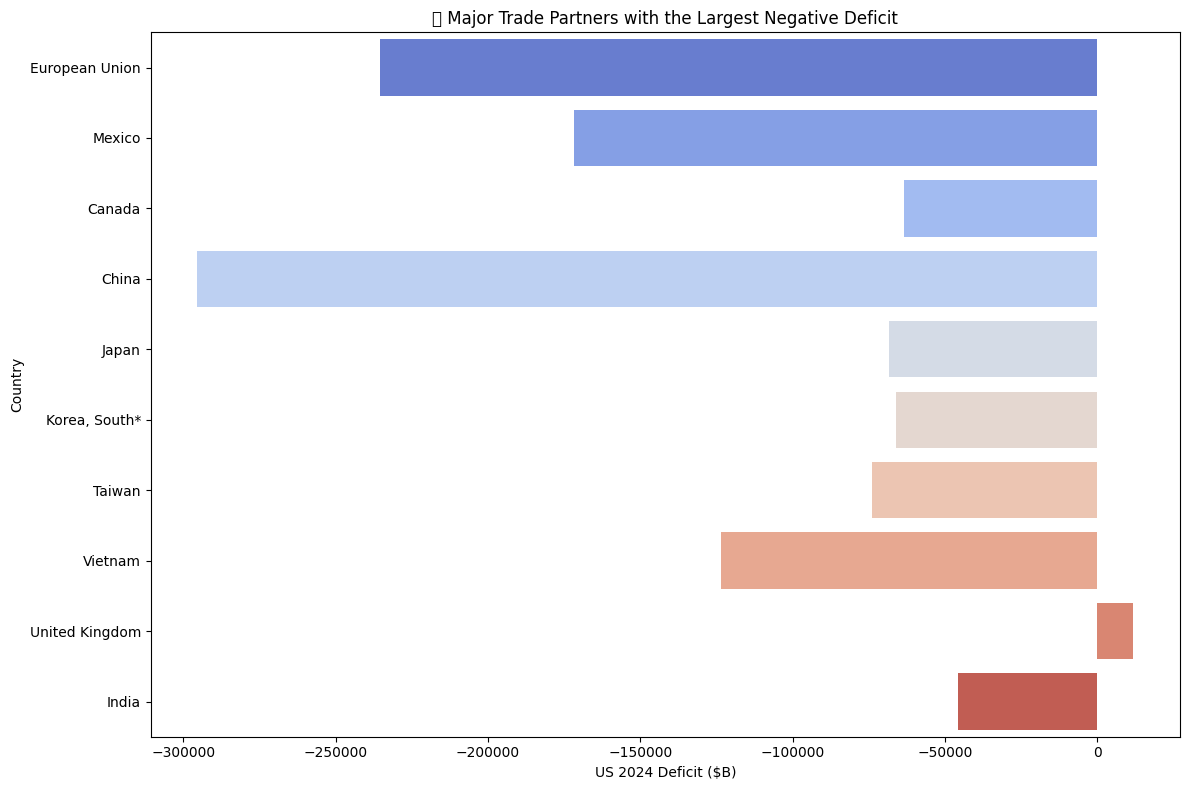

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top = df.sort_values(['Trade Volume', 'US 2024 Deficit'], ascending=[False, False])[[
    'Country', 'Trade Volume', 'US 2024 Deficit', 'Deficit Ratio'
]].head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top, x='Trade Volume', y='Country', palette='viridis')

plt.title("📉 Major Trade Partners with the Largest Negative Impact")
plt.xlabel("Trade Volume ($B)")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=top, x='US 2024 Deficit', y='Country', palette='coolwarm')

plt.title("📉 Major Trade Partners with the Largest Negative Deficit")
plt.xlabel("US 2024 Deficit ($B)")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

In [20]:
symmetric_gap = df[['Country', 'Symmetric Tariff Gap']].sort_values('Symmetric Tariff Gap', ascending=False)

print("📊 Symmetric Tariff Gap (relative unfairness in enforcement):")
print(symmetric_gap.head(10))

📊 Symmetric Tariff Gap (relative unfairness in enforcement):
           Country  Symmetric Tariff Gap
27         Nigeria              0.700000
58      Mozambique              0.695652
60          Zambia              0.693878
1   European Union              0.689655
70         Vanuatu              0.686567
53          Brunei              0.685714
29         Algeria              0.681818
56         Moldova              0.681319
10     Switzerland              0.681319
48   Liechtenstein              0.678899


In [21]:
weighted_diff = df[['Country', 'Tariff Weighted Deficit (Alleged)', 'Tariff Weighted Deficit (Response)']]
weighted_diff['Difference'] = weighted_diff['Tariff Weighted Deficit (Alleged)'] - weighted_diff['Tariff Weighted Deficit (Response)']

print("💰 Lost impact from reduced tariffs (Alleged vs Response):")
print(weighted_diff.sort_values('Difference', ascending=False).head(10))


💰 Lost impact from reduced tariffs (Alleged vs Response):
                                   Country  Tariff Weighted Deficit (Alleged)  \
102               Central African Republic                               3.36   
140                             Kyrgyzstan                              11.65   
130                             Tuvalu (-)                              10.60   
131  Gaza Strip Administered by Israel (-)                              10.70   
132                       Marshall Islands                              10.70   
133         Svalbard, Jan Mayen Island (-)                              10.80   
134              Sao Tome and Principe (-)                              11.10   
135                       Vatican City (-)                              11.20   
136                   Pitcairn Islands (-)                              11.30   
137                       Korea, North (-)                              11.40   

     Tariff Weighted Deficit (Response)  Differenc